In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

In [22]:
crimeHousing = pd.read_csv('crime-housing-austin-2015.csv')
zipCodes = pd.read_csv('AustinZipCodes.csv')
pd.set_option('display.max_columns', None)

# Crime per Month

Count           
            mean        std
Month                      
Apr    75.714286  77.695241
Aug    79.309524  82.075066
Dec    76.860465  79.168771
Feb    66.558140  68.811787
Jan    69.681818  76.547834
Jul    83.500000  82.648315
Jun    76.000000  75.057121
Mar    76.071429  79.269036
May    77.488372  81.203851
Nov    77.073171  75.907967
Oct    71.139535  73.574576

<AxesSubplot: title={'center': 'Mean and SD of crime per month'}, ylabel='Month'>

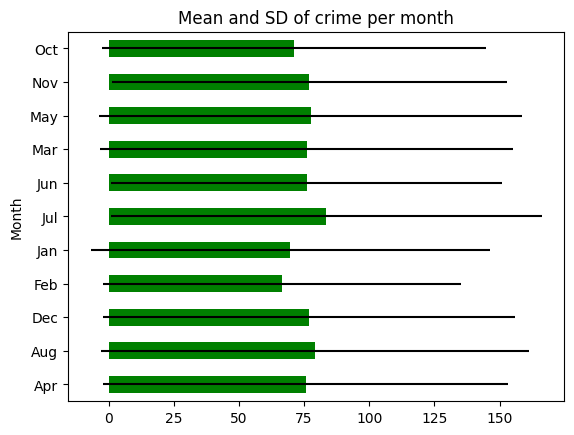

In [23]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
data = []
means = []
stds = []
for month in months:
  currentdf = crimeHousing[crimeHousing.Report_Date.str.contains(month)]
  currentdf = currentdf.groupby(by="Zip_Code_Crime")
  groups = currentdf.groups.keys()
  currentdf = currentdf.count()
  for count in currentdf.Key:
    data.append([month, count])

df = pd.DataFrame(data=data, columns=["Month", "Count"])
distribution = df.groupby("Month").agg({"Count":["mean", "std"]})
display(distribution)
distribution.Count.plot(kind = "barh", y = "mean", legend = False,
          xerr = "std", title = "Mean and SD of crime per month", color='green')

# Housing vs Crime

In [24]:
crimeAustin = crimeHousing[crimeHousing.Zip_Code_Housing.notna()]
crimeAustin = crimeHousing[['Highest_NIBRS_UCR_Offense_Description','Zip_Code_Crime']].reset_index()

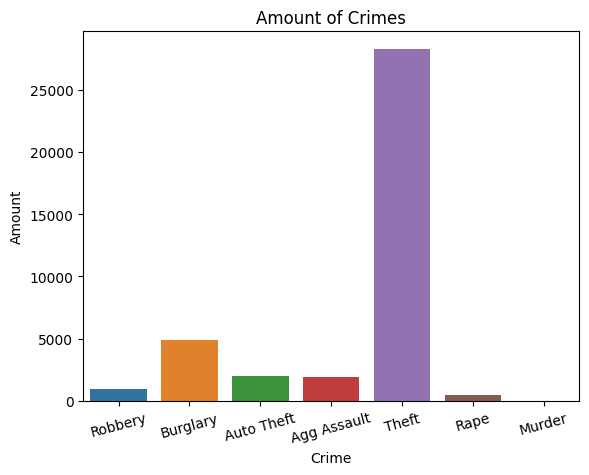

In [25]:
chart = sns.countplot(x='Highest_NIBRS_UCR_Offense_Description', data=crimeAustin)
plt.xticks(rotation=15)
chart.set_title('Amount of Crimes')
chart.set_xlabel('Crime')
chart.set_ylabel('Amount')
plt.savefig('overall-crime-stats.pdf')

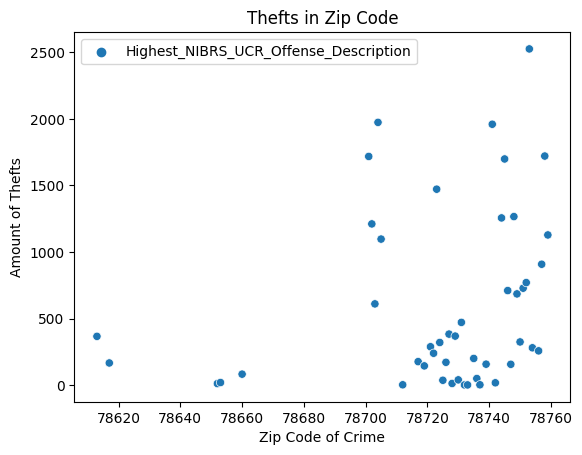

In [26]:
theft = crimeAustin[(crimeAustin.Highest_NIBRS_UCR_Offense_Description == "Theft")]
theft = theft[theft.Zip_Code_Crime.notna()]
theft.Zip_Code_Crime = theft.Zip_Code_Crime.astype('int')
theftCrime = theft.groupby('Zip_Code_Crime').agg({'Highest_NIBRS_UCR_Offense_Description': 'count'})
theftCrime.sort_values(by=['Highest_NIBRS_UCR_Offense_Description'])
ax = sns.scatterplot(data=theftCrime)
ax.set_title('Thefts in Zip Code')
ax.set_xlabel('Zip Code of Crime')
ax.set_ylabel('Amount of Thefts')
plt.savefig('thefts-zip-code.pdf')

C:\Users\levin\AppData\Local\Temp\ipykernel_11980\4213297604.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  housing['Medianhouseholdincome'] = housing['Medianhouseholdincome'].str.replace('$', '').astype('int')


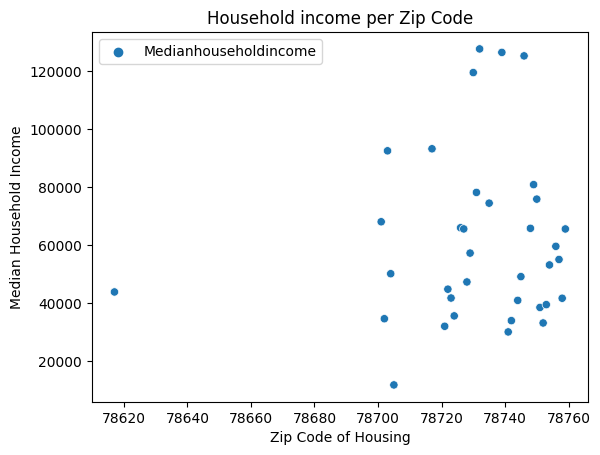

In [27]:
housing = crimeHousing[['Zip_Code_Housing', 'Medianhouseholdincome']].reset_index()
housing = housing[housing.Zip_Code_Housing.notna()]
housing.Zip_Code_Housing = housing.Zip_Code_Housing.astype('int')
housing['Medianhouseholdincome'] = housing['Medianhouseholdincome'].str.replace('$', '').astype('int')
housing = housing.groupby('Zip_Code_Housing').agg({'Medianhouseholdincome': 'mean'})
housing.sort_values(by='Zip_Code_Housing')
ax = sns.scatterplot(data=housing)
ax.set_title('Household income per Zip Code')
ax.set_xlabel('Zip Code of Housing')
ax.set_ylabel('Median Household Income')
plt.savefig('income-zip-code.pdf')

In [28]:
pearTheft = crimeHousing[(crimeAustin.Highest_NIBRS_UCR_Offense_Description == "Theft")]
pearTheft = pearTheft[pearTheft.Zip_Code_Housing.notna()]
pearTheft = pearTheft[pearTheft.Zip_Code_Crime.notna()]
pearTheft.Zip_Code_Housing = pearTheft.Zip_Code_Housing.astype('int')
pearTheft.Zip_Code_Crime = pearTheft.Zip_Code_Crime.astype('int')
pearTheft = pearTheft[['Highest_NIBRS_UCR_Offense_Description', 'Zip_Code_Crime','Zip_Code_Housing', 'Medianhouseholdincome']].reset_index()
pearTheft['Medianhouseholdincome'] = pearTheft['Medianhouseholdincome'].str.replace('$', '').astype('int')
display(stats.pearsonr(pearTheft.Zip_Code_Housing, pearTheft.Zip_Code_Crime))
display(stats.pearsonr(pearTheft.Zip_Code_Housing, pearTheft.Medianhouseholdincome))
display(stats.pearsonr(pearTheft.Zip_Code_Crime, pearTheft.Medianhouseholdincome))

C:\Users\levin\AppData\Local\Temp\ipykernel_11980\491467987.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pearTheft['Medianhouseholdincome'] = pearTheft['Medianhouseholdincome'].str.replace('$', '').astype('int')


PearsonRResult(statistic=1.0, pvalue=0.0)

PearsonRResult(statistic=0.038806729770795294, pvalue=1.40835649699256e-10)

PearsonRResult(statistic=0.038806729770795294, pvalue=1.40835649699256e-10)

C:\Users\levin\AppData\Local\Temp\ipykernel_11980\717332705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipHousing.rename(columns={'Zip_Code_Housing': 'Zip_Code'}, inplace=True)
C:\Users\levin\AppData\Local\Temp\ipykernel_11980\717332705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipCodesHousing.rename(columns={'Zip Code': 'Zip_Code'}, inplace=True)
C:\Users\levin\AppData\Local\Temp\ipykernel_11980\717332705.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when r

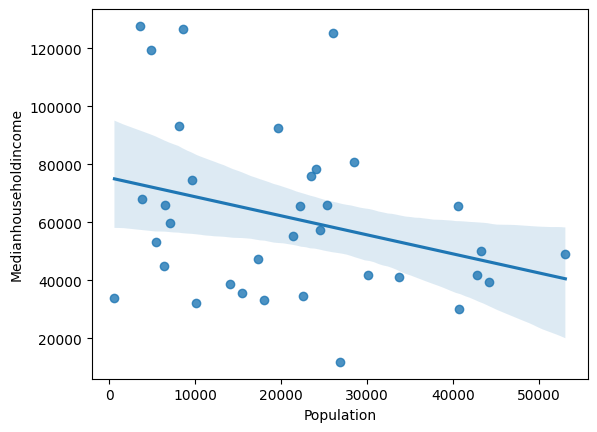

In [29]:
zipHousing = crimeHousing[['Zip_Code_Housing', 'Medianhouseholdincome']]
zipHousing.rename(columns={'Zip_Code_Housing': 'Zip_Code'}, inplace=True)
zipCodesHousing = zipCodes[['Zip Code', 'Population']]
zipCodesHousing.rename(columns={'Zip Code': 'Zip_Code'}, inplace=True)
zips = pd.merge(zipHousing, zipCodesHousing, on='Zip_Code')
zips.Zip_Code = zips.Zip_Code.astype('int')
zips['Population'] = zips['Population'].str.replace(',', '').astype('int')
zips['Medianhouseholdincome'] = zips['Medianhouseholdincome'].str.replace('$', '').astype('int')
zipsHouse = zips.groupby('Zip_Code').agg({'Medianhouseholdincome': 'mean', 'Population': 'mean'}).reset_index()
sns.regplot(data=zipsHouse, x='Population', y='Medianhouseholdincome')
ax.set_title('Household income per Zip Code')
ax.set_xlabel('Zip Code of Housing')
ax.set_ylabel('Median Household Income')
plt.savefig('zip-code-housing.pdf')

In [30]:
display(stats.ttest_ind(zipsHouse.Population, zipsHouse.Medianhouseholdincome))

Ttest_indResult(statistic=-7.405116996255614, pvalue=2.6308156779467693e-10)